In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

card_df=pd.read_csv(
    './creditcard.csv'
    ,encoding='utf-8'
)

card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

card_df=pd.read_csv(
    './creditcard.csv'
    ,encoding='utf-8'
)

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    if df is None:  
        return '데이터베이스가 존재하지 않습니다'
    else:
        df_copy = get_preprocessed_df(df)
        X_features = df_copy.iloc[:, :-1]
        y_target = df_copy.iloc[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(
            X_features,
            y_target,
            test_size=0.3,
            random_state=0,
            stratify=y_target
        )
        return X_train, X_test, y_train, y_test


X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)

print('='*50)
print(f'학습 데이터 레이블 값 비율\n{y_train.value_counts()/y_train.shape[0]*100}')
print('='*50)
print(f'테스트 데이터 레이블 값 비율\n{y_test.value_counts()/y_test.shape[0]*100}')

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

card_df=pd.read_csv(
    './creditcard.csv'
    ,encoding='utf-8'
)

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    if df is None:  
        return '데이터베이스가 존재하지 않습니다'
    else:
        df_copy = get_preprocessed_df(df)
        X_features = df_copy.iloc[:, :-1]
        y_target = df_copy.iloc[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(
            X_features,
            y_target,
            test_size=0.3,
            random_state=0,
            stratify=y_target
        )
        return X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)

# print('='*50)
# print(f'학습 데이터 레이블 값 비율\n{y_train.value_counts()/y_train.shape[0]*100}')
# print('='*50)
# print(f'테스트 데이터 레이블 값 비율\n{y_test.value_counts()/y_test.shape[0]*100}')


# 모델 생성 성능 평가 : get_clf_eval(원래답, 예측값, 예측확률)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred) # 정확도 점수
    precision = precision_score(y_test , pred) # 정밀도 점수
    recall = recall_score(y_test , pred) # 재현율 점수
    f1 = f1_score(y_test,pred) # 정밀도, 재현율 조화평균 값
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) # AUC 점수 : 불균형 데이터 셋에서 필요
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,lr_pred,lr_pred_proba)


오차 행렬
[[85280    15]
 [   54    94]]
정확도: 0.9992, 정밀도: 0.8624, 재현율: 0.6351,    F1: 0.7315, AUC:0.9727


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

card_df=pd.read_csv(
    './creditcard.csv'
    ,encoding='utf-8'
)

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    if df is None:  
        return '데이터베이스가 존재하지 않습니다'
    else:
        df_copy = get_preprocessed_df(df)
        X_features = df_copy.iloc[:, :-1]
        y_target = df_copy.iloc[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(
            X_features,
            y_target,
            test_size=0.3,
            random_state=0,
            stratify=y_target
        )
        return X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)

# print('='*50)
# print(f'학습 데이터 레이블 값 비율\n{y_train.value_counts()/y_train.shape[0]*100}')
# print('='*50)
# print(f'테스트 데이터 레이블 값 비율\n{y_test.value_counts()/y_test.shape[0]*100}')

from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba=lr_clf.predict_proba(X_test)[:,1]


# 모델 생성 성능 평가 : get_clf_eval(원래답, 예측값, 예측확률)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred) # 정확도 점수
    precision = precision_score(y_test , pred) # 정밀도 점수
    recall = recall_score(y_test , pred) # 재현율 점수
    f1 = f1_score(y_test,pred) # 정밀도, 재현율 조화평균 값
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) # AUC 점수 : 불균형 데이터 셋에서 필요
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def get_model_train_eval(
    model                   # 분류 알고리즘
    ,ftr_train=None         # 학습 데이터
    ,ftr_test=None          # 테스트 데이터
    ,tgt_train=None         # 학습 데이터 레이블
    ,tgt_test=None          # 테스트 데이터 레이블
    ):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:,1] # 예측 확률
    get_clf_eval(tgt_test,pred,pred_proba)


from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=1000
    ,num_leaves=64
    #, n_jobs=-1 # cpu 일때만 사용
    ,device='gpu' # gpu 일때만 사용
    ,boosting_from_average=False # 극도로 불균형한 레이블일 경우 False를 줘야 함
)

# lightGBM
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

# LogisticRegression
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)



[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (6.08 MB) transferred to GPU in 0.008578 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

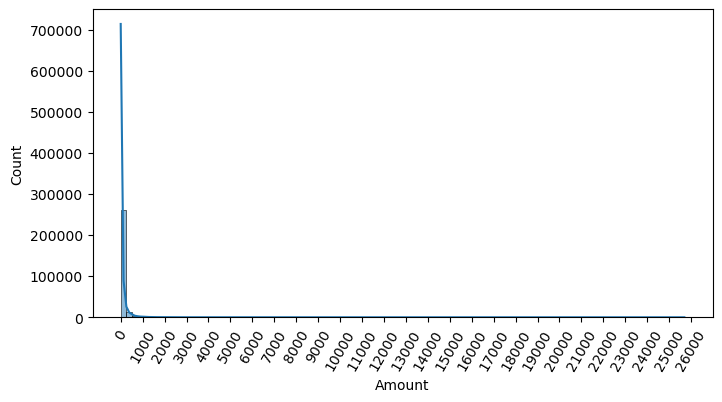

In [5]:
# 특정 피쳐(금액)의 데이터 분포 확인
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

card_df=pd.read_csv(
    './creditcard.csv'
    ,encoding='utf-8'
)

plt.figure(figsize=(8,4))
plt.xticks(
    range(0,30000,1000)
    ,rotation=60
)
sns.histplot(card_df['Amount'],bins=100,kde=True)
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')  

import seaborn as sns

# CSV 파일을 읽어와 DataFrame으로 저장  
card_df = pd.read_csv(
    './creditcard.csv',  # 신용카드 거래 데이터 파일 경로
    encoding='utf-8'  # UTF-8 인코딩으로 파일을 읽음
)

# 외도(Skewness) 값 확인: 데이터의 비대칭성을 확인하기 위함
# 비대칭 데이터의 경우 로그 변환 등으로 정규성을 확보할 필요가 있음

# 첨도(Kurtosis) 값 확인: 극단값(outlier)의 존재 여부를 판단하기 위함
# 양의 첨도: 분포의 꼬리가 두껍고, 중앙이 뾰족 -> 극단값이 자주 발생
#           -> 극단값 처리가 필요하며, 적절한 모델 선택이 중요
# 음의 첨도: 분포의 꼬리가 얇고, 중앙이 평평 -> 극단값이 적게 발생  
# 중간 첨도: 정규분포에 가까움 (외도와 첨도가 0에 가까움)

from scipy.stats import skew  # 외도 계산 함수
from scipy.stats import kurtosis  # 첨도 계산 함수

# 'Amount' 열의 외도(Skewness) 값 출력
print(f"외도 : {skew(card_df['Amount'])}")
print(f"첨도 : {kurtosis(card_df['Amount'])}")

외도 : 16.97763503663315
첨도 : 845.0777883188754


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')  

import seaborn as sns

# CSV 파일을 읽어와 DataFrame으로 저장  
card_df = pd.read_csv(
    './creditcard.csv',  # 신용카드 거래 데이터 파일 경로
    encoding='utf-8'  # UTF-8 인코딩으로 파일을 읽음
)

from scipy.stats import shapiro

stat,p=shapiro(card_df['Amount'].values)
print(f'통계량 : {stat}')
print(f'p-value : {p}')

통계량 : 0.31004461476982703
p-value : 6.536480219597055e-199


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')  

import seaborn as sns

# CSV 파일을 읽어와 DataFrame으로 저장  
card_df = pd.read_csv(
    './creditcard.csv',  # 신용카드 거래 데이터 파일 경로
    encoding='utf-8'  # UTF-8 인코딩으로 파일을 읽음
)

from scipy.stats import shapiro

stat,p=shapiro(card_df['Amount'].values)

print(f'통계량 : {stat}')
print(f'p-value : {p}')

if p>0.05:
    print('정규성을 만족')
else:
    print('정규성 없음')

통계량 : 0.31004461476982703
p-value : 6.536480219597055e-199
정규성 없음


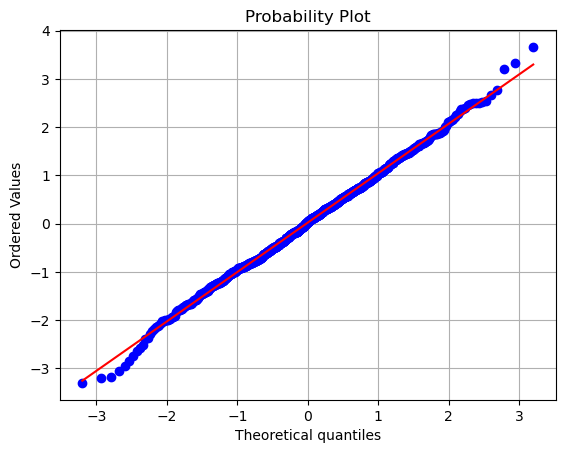

In [9]:
# 정규성 있는 데이터 시각화
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data=np.random.normal(loc=0,  scale=1,size=1000)

# QQ plot 생성
stats.probplot(data,dist='norm',plot=plt)
plt.grid()
plt.show()

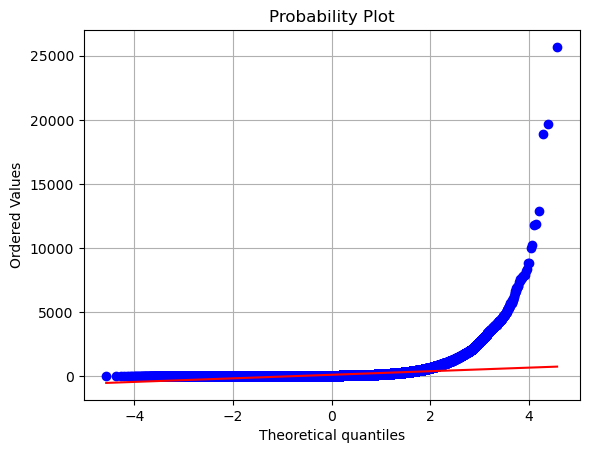

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')  

import seaborn as sns

# CSV 파일을 읽어와 DataFrame으로 저장  
card_df = pd.read_csv(
    './creditcard.csv',  # 신용카드 거래 데이터 파일 경로
    encoding='utf-8'  # UTF-8 인코딩으로 파일을 읽음
)

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data=np.random.normal(loc=0,  scale=1,size=1000)

# QQ plot 생성
stats.probplot(card_df['Amount'].values,dist='norm',plot=plt)
plt.grid()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')  

import seaborn as sns

# CSV 파일을 읽어와 DataFrame으로 저장  
card_df = pd.read_csv(
    './creditcard.csv',  # 신용카드 거래 데이터 파일 경로
    encoding='utf-8'  # UTF-8 인코딩으로 파일을 읽음
)

# standarization : 데이터 정규분포 형태로 변환

from sklearn.preprocessing import StandardScaler

# 기존의 Amount feature의 평균,표준편차, 외도, 첨도
avg_amount=card_df['Amount'].mean()
std_amount=card_df['Amount'].std()

from scipy.stats import skew  # 외도 계산 함수
from scipy.stats import kurtosis  # 첨도 계산 함수
skew_amount=skew(card_df['Amount'])
kurtosis_amount=kurtosis(card_df['Amount'])

# StandardScaler 적용한 Amount feature의 평균,표준편차, 외도, 첨도
scaler=StandardScaler()
ss_amount=scaler.fit_transform(card_df['Amount'].values.reshape(-1,1))

print('기존 데이터 Amount 컬럼의 평균 ,표준편차 ,외도 ,첨도')
print(f'{avg_amount} / {std_amount} / {skew_amount} / {kurtosis_amount}')
print('='*100)
print('표준화한 데이터 Amount 컬럼의 평균 ,표준편차 ,외도 ,첨도')
print(f'{ss_amount.mean()} / {ss_amount.std()} / {skew(ss_amount)} / {kurtosis(ss_amount)}')

기존 데이터 Amount 컬럼의 평균 ,표준편차 ,외도 ,첨도
88.34961925093133 / 250.1201092402221 / 16.97763503663315 / 845.0777883188754
표준화한 데이터 Amount 컬럼의 평균 ,표준편차 ,외도 ,첨도
2.913951958230651e-17 / 1.0 / [16.97763504] / [845.07778832]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

card_df=pd.read_csv(
    './creditcard.csv'
    ,encoding='utf-8'
)

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    if df is None:  
        return '데이터베이스가 존재하지 않습니다'
    else:
        df_copy = get_preprocessed_df(df)
        X_features = df_copy.iloc[:, :-1]
        y_target = df_copy.iloc[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(
            X_features,
            y_target,
            test_size=0.3,
            random_state=0,
            stratify=y_target
        )
        return X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)

# print('='*50)
# print(f'학습 데이터 레이블 값 비율\n{y_train.value_counts()/y_train.shape[0]*100}')
# print('='*50)
# print(f'테스트 데이터 레이블 값 비율\n{y_test.value_counts()/y_test.shape[0]*100}')

from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba=lr_clf.predict_proba(X_test)[:,1]


# 모델 생성 성능 평가 : get_clf_eval(원래답, 예측값, 예측확률)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred) # 정확도 점수
    precision = precision_score(y_test , pred) # 정밀도 점수
    recall = recall_score(y_test , pred) # 재현율 점수
    f1 = f1_score(y_test,pred) # 정밀도, 재현율 조화평균 값
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) # AUC 점수 : 불균형 데이터 셋에서 필요
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def get_model_train_eval(
    model                   # 분류 알고리즘
    ,ftr_train=None         # 학습 데이터
    ,ftr_test=None          # 테스트 데이터
    ,tgt_train=None         # 학습 데이터 레이블
    ,tgt_test=None          # 테스트 데이터 레이블
    ):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:,1] # 예측 확률
    get_clf_eval(tgt_test,pred,pred_proba)


from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=1000
    ,num_leaves=64
    #, n_jobs=-1 # cpu 일때만 사용
    ,device='gpu' # gpu 일때만 사용
    ,boosting_from_average=False # 극도로 불균형한 레이블일 경우 False를 줘야 함
)

print('StandarScaler 처리 전')
print('lightGBM')
# lightGBM
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('='*100)
print('LogisticRegression')
# LogisticRegression
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('='*100)
print('StandarScaler 처리 후')
# 데이터를 StandarScaler 처리 후 성능 평가
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler=StandardScaler()
    ss_amount=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_Scaled',ss_amount)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy # 전처리 된 데이터프레임 반환

# 원본 데이터프레임 : card_df
X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)


print('로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('='*100)
print('lightGBM 예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

StandarScaler 처리 전
lightGBM
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (6.08 MB) transferred to GPU in 0.008672 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')  

import seaborn as sns

# CSV 파일을 읽어와 DataFrame으로 저장  
card_df = pd.read_csv(
    './creditcard.csv',  # 신용카드 거래 데이터 파일 경로
    encoding='utf-8'  # UTF-8 인코딩으로 파일을 읽음
)

# 기존의 Amount feature의 평균, 표준편차, 왜도, 첨도
avg_amount = card_df['Amount'].mean()
std_amount = card_df['Amount'].std()

from scipy.stats import skew, kurtosis  # 왜도, 첨도 계산 함수

skew_amount = skew(card_df['Amount'])
kurtosis_amount = kurtosis(card_df['Amount'])

# StandardScaler 적용한 Amount feature의 평균,표준편차, 외도, 첨도
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ss_amount=scaler.fit_transform(card_df['Amount'].values.reshape(-1,1))


# 로그 변환 적용
log_amount = np.log1p(card_df['Amount'])


# 로그 변환 후 평균, 표준편차, 왜도, 첨도
log_avg_amount = log_amount.mean()
log_std_amount = log_amount.std()
log_skew_amount = skew(log_amount)
log_kurtosis_amount = kurtosis(log_amount)

print('='*100)
print('기존 데이터 Amount 컬럼의 평균 ,표준편차 ,왜도 ,첨도')
print(f'{avg_amount} / {std_amount} / {skew_amount} / {kurtosis_amount}')

print('='*100)
print('log화한 데이터 Amount 컬럼의 평균 ,표준편차 ,외도 ,첨도')
print(f'{ss_amount.mean()} / {ss_amount.std()} / {skew(ss_amount)} / {kurtosis(ss_amount)}')
print('='*100)
print('로그 변환한 데이터 Amount 컬럼의 평균 ,표준편차 ,왜도 ,첨도')
print(f'{log_avg_amount} / {log_std_amount} / {log_skew_amount} / {log_kurtosis_amount}')
print('='*100)


기존 데이터 Amount 컬럼의 평균 ,표준편차 ,왜도 ,첨도
88.34961925093133 / 250.1201092402221 / 16.97763503663315 / 845.0777883188754
log화한 데이터 Amount 컬럼의 평균 ,표준편차 ,외도 ,첨도
2.913951958230651e-17 / 1.0 / [16.97763504] / [845.07778832]
로그 변환한 데이터 Amount 컬럼의 평균 ,표준편차 ,왜도 ,첨도
3.152188061233118 / 1.656648387252991 / 0.16270207082889335 / -0.6397064662524841


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

card_df=pd.read_csv(
    './creditcard.csv'
    ,encoding='utf-8'
)

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    if df is None:  
        return '데이터베이스가 존재하지 않습니다'
    else:
        df_copy = get_preprocessed_df(df)
        X_features = df_copy.iloc[:, :-1]
        y_target = df_copy.iloc[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(
            X_features,
            y_target,
            test_size=0.3,
            random_state=0,
            stratify=y_target
        )
        return X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)

# print('='*50)
# print(f'학습 데이터 레이블 값 비율\n{y_train.value_counts()/y_train.shape[0]*100}')
# print('='*50)
# print(f'테스트 데이터 레이블 값 비율\n{y_test.value_counts()/y_test.shape[0]*100}')

from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba=lr_clf.predict_proba(X_test)[:,1]


# 모델 생성 성능 평가 : get_clf_eval(원래답, 예측값, 예측확률)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred) # 정확도 점수
    precision = precision_score(y_test , pred) # 정밀도 점수
    recall = recall_score(y_test , pred) # 재현율 점수
    f1 = f1_score(y_test,pred) # 정밀도, 재현율 조화평균 값
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) # AUC 점수 : 불균형 데이터 셋에서 필요
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def get_model_train_eval(
    model                   # 분류 알고리즘
    ,ftr_train=None         # 학습 데이터
    ,ftr_test=None          # 테스트 데이터
    ,tgt_train=None         # 학습 데이터 레이블
    ,tgt_test=None          # 테스트 데이터 레이블
    ):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:,1] # 예측 확률
    get_clf_eval(tgt_test,pred,pred_proba)


from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=1000
    ,num_leaves=64
    #, n_jobs=-1 # cpu 일때만 사용
    ,device='gpu' # gpu 일때만 사용
    ,boosting_from_average=False # 극도로 불균형한 레이블일 경우 False를 줘야 함
)

print('StandarScaler 처리 전')
print('lightGBM')
# lightGBM
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('='*100)
print('LogisticRegression')
# LogisticRegression
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('='*100)
print('StandarScaler 처리 후')

# 데이터를 StandarScaler 처리 후 성능 평가
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler=StandardScaler()
    ss_amount=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_Scaled',ss_amount)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy # 전처리 된 데이터프레임 반환

# 원본 데이터프레임 : card_df
X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)


print('로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('='*100)
print('lightGBM 예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('='*100)
print('log 처리 후')
print('='*100)

# 데이터를 log 처리 후 성능 평가

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled', ss_amount)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    return df_copy # 전처리된 데이터 프레임 반환 

X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)


print('로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('='*100)
print('lightGBM 예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

StandarScaler 처리 전
lightGBM
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (6.08 MB) transferred to GPU in 0.009819 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

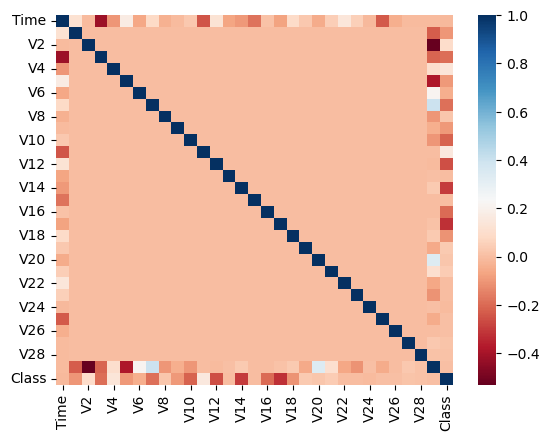

In [15]:
# 이상치 검출/제거
# 상관계수 확인
import seaborn as sns

plt.Figure(
    figsize=(9,9)
)
corr=card_df.corr()

sns.heatmap(
    corr
    ,cmap='RdBu'
)
plt.show()

In [21]:
# 이상치 데이터에 대한 인덱스를 반환하는 함수

# df=card_df 대입 예정
# column='V14
def get_outlier(df=None,column=None,weight=1.5):
    # 사기(class==1)에 해당하는 컬럼만 추출, 사분위(Q1,Q3) 지점을 구함
    fraud=df[df['Class']==1][column]
    q_25=np.percentile(fraud.values,25) # Q1 위치 값
    q_75=np.percentile(fraud.values,75) # Q3 위치 값
    # IQR 구하고, 1.5 곱하기
    iqr = q_75 - q_25
    iqr_weight=iqr*weight
    low_value=q_25-iqr_weight # min
    high_value=q_75+iqr_weight # max
    
    # 최대값 보다 크고, 최소값 보다 작은 인덱스 반환
    outlier_index=fraud[(fraud<low_value) | (fraud>high_value)].index
    return outlier_index

outlier_index=get_outlier(df=card_df,column='V14')
print(f'이상치 데이터의 인덱스 : {outlier_index}')

이상치 데이터의 인덱스 : Index([8296, 8615, 9035, 9252], dtype='int64')


In [29]:
# get_preprocessed_df() 에 이상치 제거 하는 기능 추가
# 로그변환, 이상치 제거 추가
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    # Amount feature만 로그 변환
    amount_n=np.log1p(df_copy['Amount'])
    # 로그변환한 피처를 데이터 프레임에 삽입(insert)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    df_copy.insert(0, 'Amount_scaled', amount_n)
    # 이상치 데이터 제거
    outlier_index=get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train,X_test,y_train,y_test=get_train_test_dataset(df=card_df)
print('###로지스틱 회귀###')
get_model_train_eval(
    lr_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

print('###lightgbm 예측 성능###')
get_model_train_eval(
    lgbm_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

###로지스틱 회귀###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712, F1: 0.7568, AUC:0.9725
###lightgbm 예측 성능###
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (6.08 MB) transferred to GPU in 0.008518 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001715 -> initscore=-6.366350
[LightGBM] [Info] Start training from score -6.366350
[Lig

In [32]:
# over sampling
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)
X_train_over,y_train_over=smote.fit_resample(X_train,y_train)

print(f'SMOTE 적용 전 학습용 피쳐/레이블의 구조 : {X_train.shape,y_train.shape}')
print(f'SMOTE 적용 후 학습용 피쳐/레이블의 구조 : {X_train_over.shape,y_train_over.shape}')
print(f'SMOTE 적용 전 레이블 값 분포 : {pd.Series(y_train).value_counts()}')
print(f'SMOTE 적용 후 레이블 값 분포 : {pd.Series(y_train_over).value_counts()}')

SMOTE 적용 전 학습용 피쳐/레이블의 구조 : ((199362, 29), (199362,))
SMOTE 적용 후 학습용 피쳐/레이블의 구조 : ((398040, 29), (398040,))
SMOTE 적용 전 레이블 값 분포 : Class
0    199020
1       342
Name: count, dtype: int64
SMOTE 적용 후 레이블 값 분포 : Class
0    199020
1    199020
Name: count, dtype: int64


In [34]:
# 로지스틱 회귀의 성능 평가
lr_clf=LogisticRegression(max_iter=1000)

get_model_train_eval(
    lr_clf
    ,ftr_train=X_train_over
    ,ftr_test=X_test
    ,tgt_train=y_train_over
    ,tgt_test=y_test
)


오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247, F1: 0.1022, AUC:0.9736


In [35]:
# lightgbm 성능 평가

get_model_train_eval(
    lgbm_clf
    ,ftr_train=X_train_over
    ,ftr_test=X_test
    ,tgt_train=y_train_over
    ,tgt_test=y_test
)


[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Warning] Unknown parameter: boosting_from_average
[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (12.15 MB) transferred to GPU in 0.016017 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 